In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.shape

(300153, 12)

In [6]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [6]:
for i in df.columns:
    print(i, df[i].nunique())

Unnamed: 0 300153
airline 6
flight 1561
source_city 6
departure_time 6
stops 3
arrival_time 6
destination_city 6
class 2
duration 476
days_left 49
price 12157


In [7]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [8]:
cat_cols = ['airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class']

for i in cat_cols:
    print(df.groupby(i)['price'].mean())
    print('='*25)

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64
flight
6E-102     2067.435897
6E-105     4079.000000
6E-113     5073.938776
6E-121     1702.000000
6E-123     6249.400000
              ...     
UK-988    37685.530775
UK-993    30494.012075
UK-994    36401.095837
UK-995    31270.540039
UK-996    38622.834913
Name: price, Length: 1561, dtype: float64
source_city
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839
Name: price, dtype: float64
departure_time
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Late_Night        9295.299387
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64
stops
one            22900.992482
two_or_more    14113.450775
zero            9375.9385

In [9]:
for i in cat_cols:
    print(df.groupby(['class', i])['price'].mean())
    print('='*25)

class     airline  
Business  Air_India    47131.039212
          Vistara      55477.027777
Economy   AirAsia       4091.072742
          Air_India     7313.682169
          GO_FIRST      5652.007595
          Indigo        5324.216303
          SpiceJet      6179.278881
          Vistara       7806.943645
Name: price, dtype: float64
class     flight
Business  AI-401    48058.403922
          AI-402    52583.321477
          AI-403    37054.638889
          AI-406    44118.333333
          AI-407    36924.090909
                        ...     
Economy   UK-988     7071.857143
          UK-993     6224.652747
          UK-994     7192.028007
          UK-995     6751.474708
          UK-996     7048.294719
Name: price, Length: 1855, dtype: float64
class     source_city
Business  Bangalore      53723.539687
          Chennai        54140.530529
          Delhi          48697.983457
          Hyderabad      50370.466200
          Kolkata        56607.860536
          Mumbai         52740

class
Business    Axes(0.125,0.11;0.775x0.77)
Economy     Axes(0.125,0.11;0.775x0.77)
Name: price, dtype: object

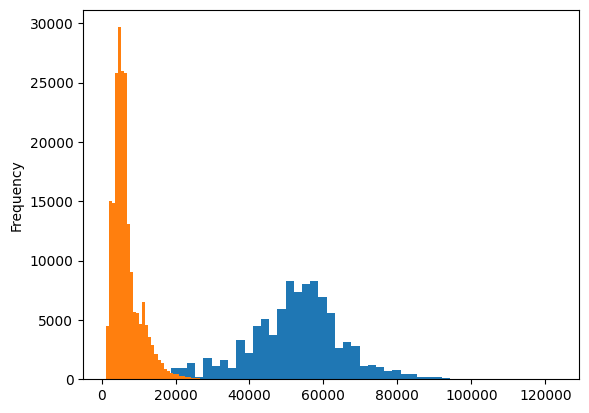

In [11]:
df.groupby('class')['price'].plot(kind = 'hist', bins = 50)

<Axes: >

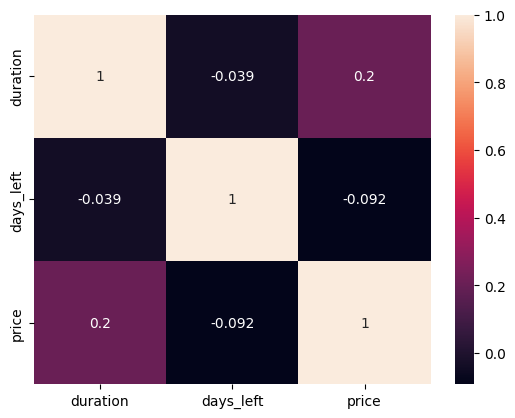

In [14]:
sns.heatmap(data = df.loc[:, ['duration', 'days_left', 'price']].corr(), annot = True)